# Curso de Optimización (DEMAT)
## Parcial 1

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Abril 6, 2022**    |
| Hora de inicio:                      | **15:00**            |
| Hora límite de entrega:              | **18:00**            |


### Indicaciones

Lea con cuidado los ejercicios.

Puede usar las notas de clase y las tareas hechas para resolver el examen.

Al final, entregue el notebook con sus respuestas, junto con los códigos que hagan falta para reproducir los resultados. Si es más de un archivo, genere un archivo ZIP que contenga el notebook y los scripts adicionales.

A partir del notebook genere un archivo PDF con las respuestas y envíelo por separado 
antes de la hora límite.


## Ejercicio 1. (3 puntos)

Considere la función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ 
definida como

$$ f(\mathbf{x}) = \sum_{i=1}^n x_i^2  
+ \left(0.5 \sum_{i=1}^n i x_i  \right)^2
+ \left(0.5 \sum_{i=1}^n i x_i  \right)^4
$$

1. Para $n=2, 4, 8, 16, 32$, aplique el método de descenso máximo encontrar
   un mínimo de la función $f$, usando como punto inicial 
   $$ \mathbf{x}_0 = (5, -5, 5, -5, ..., 5, -5), $$
   y una tolerancia $\tau = \epsilon_m^{1/3}$ para terminar el algoritmo
   cuando $\|\nabla f(\mathbf{x}_k)\|<\tau$.
   
- Para calcular el tamaño de paso $\alpha_k$ use el algoritmo de backtracking.
- Reporte el valor $n$, el punto $\mathbf{x}_k$ que devuelve el algoritmo,
  el valor de $k$, la magnitud $\|\nabla f(\mathbf{x}_k)\|$ y un mensaje
  que indique si cumplió el criterio de convergencia del algoritmo.
  
2. Repita el paso ejercicio anterior usando el método de Newton,
   con tamaño de paso $\alpha_k=1$. 
   
3. Escriba un comentario sobre el desempeño de estos métodos de optimización
   cuando la dimensión $n$ aumenta.
   
> **Nota:** Puede calcular el gradiente y Hessiana de la función de 
> manera analítica o usar aproximaciones numéricas.
   
### Respuesta

Utilizaremos el módulo `lib_examen_1` para importar desde ahí las funciones correspondientes a cada algoritmo de optimización. En este caso usaremos `grad_max` para el método de descenso máximo y `newton_fix_step` para el método de Newton

### Método de descenso máximo

In [1]:
import numpy as np
import importlib
import lib_examen_1
importlib.reload(lib_examen_1)
from lib_examen_1 import proof_grad_max, f_eje1, grad_f_eje1

tol=np.finfo(float).eps**(1/3)
N=1000
rho=0.8

n_values=[2,4,8,16,32]
for n in n_values:
    x0=np.array([5.0*(-1)**i for i in range(n)])
    print('El valor de n es: ',n)
    proof_grad_max(f_eje1,grad_f_eje1,x0,N,tol,rho)
    print('\n\n')

El valor de n es:  2
El algoritmo de descenso máximo con backtracking CONVERGE
k =  118
xk =  [-5.75245424e-07 -1.15049085e-06]
fk =  3.722707097928575e-12
||gk|| =  5.788295421060735e-06



El valor de n es:  4
El algoritmo de descenso máximo con backtracking CONVERGE
k =  141
xk =  [5.78189256e-08 1.15621241e-07 1.73445703e-07 2.31248018e-07]
fk =  8.52298038012629e-13
||gk|| =  5.383134151117816e-06



El valor de n es:  8
El algoritmo de descenso máximo con backtracking CONVERGE
k =  514
xk =  [ 4.18702547e-07 -4.04817040e-07  4.27959552e-07 -3.95560035e-07
  4.37216557e-07 -3.86303030e-07  4.46473562e-07 -3.77046025e-07]
fk =  1.487461552736672e-12
||gk|| =  5.684802804595089e-06



El valor de n es:  16
El algoritmo de descenso máximo con backtracking NO CONVERGE
k =  1000
xk =  [ 0.14996026 -0.14786586  0.15135652 -0.1464696   0.15275279 -0.14507334
  0.15414905 -0.14367707  0.15554531 -0.14228081  0.15694158 -0.14088455
  0.15833784 -0.13948828  0.1597341  -0.13809202]
fk =  0.

### Método de Newton
Con el mismo número de iteraciones máxima y tolerancia ejecutamos el método de Newton


In [2]:
importlib.reload(lib_examen_1)
from lib_examen_1 import newton_fix_step, hess_f_eje1

for n in n_values:
    x0=np.array([5.0*(-1)**i for i in range(n)])
    dic_results, trayectory=newton_fix_step(f_eje1,grad_f_eje1,
    hess_f_eje1,x0,N,tol)
    print('El valor de n es: ',n)
    # Punto crítico
    if dic_results['res']==1:
        print('res = ',dic_results['res'])
        print('El método de descenso máximo con paso fijo CONVERGE')
        print('k = ',dic_results['k'])
        print('fk = ',dic_results['fk'])
        print('||gk|| = ',np.linalg.norm(dic_results['gk']))
        xk=np.squeeze(dic_results['xk'])
        print('xk = ',xk)
    elif dic_results['res']==0:
        print('res = ',dic_results['res'])
        print('El método de descenso máximo con paso exacto NO CONVERGE')
        print('k = ',dic_results['k'])
        print('fk = ',dic_results['fk'])
        print('||gk|| = ',np.linalg.norm(dic_results['gk']))
        xk=np.squeeze(dic_results['xk'])
        print('xk = ',xk)
    print('\n')
    


El valor de n es:  2
res =  1
El método de descenso máximo con paso fijo CONVERGE
k =  6
fk =  1.692176464050546e-13
||gk|| =  1.2340821762126418e-06
xk =  [-1.22644073e-07 -2.45288145e-07]


El valor de n es:  4
res =  1
El método de descenso máximo con paso fijo CONVERGE
k =  9
fk =  1.4140683764719477e-31
||gk|| =  2.1926770122390276e-15
xk =  [-2.35483100e-17 -4.70972553e-17 -7.06457242e-17 -9.41945107e-17]


El valor de n es:  8
res =  1
El método de descenso máximo con paso fijo CONVERGE
k =  10
fk =  1.575705360411473e-13
||gk|| =  5.724916723985908e-06
xk =  [-3.85408023e-09 -7.70816045e-09 -1.15622407e-08 -1.54163209e-08
 -1.92704011e-08 -2.31244814e-08 -2.69785616e-08 -3.08326418e-08]


El valor de n es:  16
res =  1
El método de descenso máximo con paso fijo CONVERGE
k =  12
fk =  8.338488006148036e-18
||gk|| =  1.1183797212584844e-07
xk =  [-3.85533594e-12 -7.71067184e-12 -1.15660078e-11 -1.54213436e-11
 -1.92766790e-11 -2.31320155e-11 -2.69873515e-11 -3.08426873e-11
 -3.46

La convergencia del método de Newton es mucho mejor, porque de hecho la función es casi cuadrática y pues el método de Newton esta basado en una aproximación de orden 2. El número de iteraciones aumenta como aumenta la dimensión esto se debe al tiempo se tarde en evaluar las expresiones pero intuitivamente es más porque la suma $\sum rx_r$ tiene a aumentar en unos ejes más que en otros, por lo que tenemos el problema de las elipses alargadas quizas en el método de descenso máximo, entonces descenso máximo con el algoritmo de backtracking el tamaño de paso que se tiene que dar es pequeño lo que aumenta el número de iteraciones aun más. 

## Ejercicio 2. (4 puntos)

Ajustar el modelo 

$$ g(x; z_1, z_2, z_3, z_4)
= z_1 - z_2\exp(-\exp(z_3+z_4\log(x)))
$$

al conjunto de puntos $\{(x_i, y_i)\}$ que se muestran a continuación:

Text(0, 0.5, 'y')

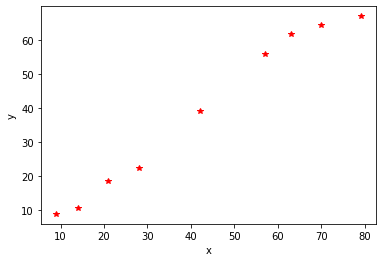

In [3]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[ 9.0,  8.93],
                   [14.0, 10.80],
                   [21.0, 18.59],
                   [28.0, 22.33],
                   [42.0, 39.35],
                   [57.0, 56.11],
                   [63.0, 61.73],
                   [70.0, 64.62],
                   [79.0, 67.08]])

plt.plot(puntos[:,0], puntos[:,1], 'r*')
plt.xlabel('x')
plt.ylabel('y')

Considere los residuales 

$$ r_i(\mathbf{z}) = r_i(z_1, z_2, z_3, z_4) = g(x_1; z_1, z_2, z_3, z_4) - y_i $$

Calcule los parámetros $\mathbf{z} = (z_1, z_2, z_3, z_4)$ resolviendo el problema
de mínimos cuadrados 

$$ \min_{z} \; f(\mathbf{z}) = \frac{1}{2}\sum_{i=1}^9 r_i^2(\mathbf{z}). $$

1. Aplique el método de Levenberg-Marquart partiendo del punto inicial
   $\mathbf{z}_0 = (75, 50.0, -5, 1.1)$, una tolerancia $\tau=\sqrt{\epsilon_m}$ y $\mu_{ref}=0.001$
   (ver Tarea 7).
   Reporte el punto $\mathbf{z}_k$ que devuelve el algoritmo, el valor 
   $f(\mathbf{z}_k)$, el número de iteraciones $k$ y la variable $res$ que indica
   si el algoritmo terminó porque se cumplió la tolerancia dada.
2. Grafique los datos y la curva del modelo usando los valores del punto inicial
   $\mathbf{z}_0$ y del punto $\mathbf{z}_k$ que devuelve el algoritmo.
3. En algunos casos puede ser complicado encontrar un buen punto inicial
   para el algoritmo. Pruebe con  diferentes puntos iniciales generados 
   de manera aleatoria y conserve la mejor solución encontrada:
   
- Para $i=1, 2, ..., 25$, genere el punto inicial 
  $\mathbf{z}_0 = (z_{0,1}, z_{0,2}, z_{0,3}, z_{0,4})$ 
  aleatoriamente, de modo que
  
$$ z_{0,1} \in [50, 80], \quad z_{0,2} \in [50, 80], 
\quad z_{0,3} \in [-10, -5], \quad  z_{0,4} \in [1, 2] $$
- Para cada punto inicial, ejecute el método de Levenberg-Marquart.
- En cada iteración, imprima los valores

$$i, \quad \mathbf{z}_{k_i}, \quad  k_i,  \quad  f(\mathbf{z}_{k_i}), \quad res$$

- Defina $\mathbf{z}_{min}$ como el punto $\mathbf{z}_{k_i}$
  en el que se obtuvo el menor valor de $f(\mathbf{z})$ para $i=1,2,...25$,
  y defina  $\mathbf{z}_{ini}$ como el punto inicial $\mathbf{z}_0$ con el cual 
  se obtuvo $\mathbf{z}_{min}$.
- Grafique los datos y la curva del modelo usando los valores del punto
  $\mathbf{z}_{ini}$ y los valores del mejor punto $\mathbf{z}_{min}$.
- Revisando los valores de $f(\mathbf{z}_{k_i})$, escriba un comentario sobre 
  sobre si es fácil o no alcanzar el mejor valor $f(\mathbf{z}_{min})$ o
  que se mantengan los valores de los parámetros $z_1, z_2, z_3, z_4$
  en los intervalos que se consideraron para dar los valores iniciales.
  
  
> **Nota 1:** Debido a las exponenciales que aparecen en el modelo $g(x; \mathbf{z})$
> puede ocurrir un desbordamiento de los valores o en la solución del
> sistema de ecuaciones, etc. Puede agregar el manejo de excepciones para
> que no se interrumpa el ciclo que genera a los puntos $\mathbf{z}_{k_i}$.
> Como el objetivo es quedarse con el mejor punto, no importa si en  
> algunos casos el algoritmo falla o se interrumpe por generarse una excepción.

> **Nota 2:** Para generar un número aleatorio con distribución uniforme
> en el intervalo $[a,b]$ puede usar $a + np.random.rand(1)*(b-a)$.

   

### Respuesta

La función que ejecuta el algoritmo de Levenberg-Marquardt y grafica el modelo paramétrico con $z_0$ y $z_k$ es `proof_levenberg_marquardt_nlls`. A continuación ejecutamos esta función con $z_0=(75,50,-5,1.1)$

El algoritmo de Levenberg-Marquardt CONVERGE
z0 =  [75.  50.  -5.   1.1]
f(z0) =  935.6411376104923
zk =  [ -50.54719015  -89.38496793 -427.67921188 -986.93518848]
f(zk) =  2324.031677777778
|pk| =  4.976683322014578e-10
k =  8


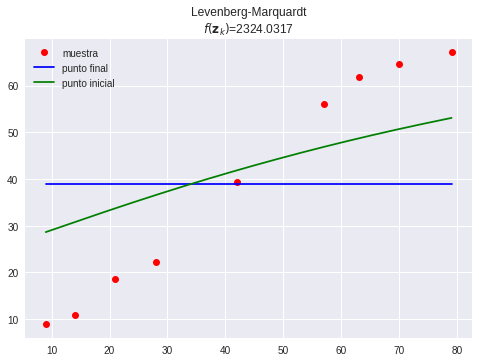

In [4]:
importlib.reload(lib_examen_1)
from lib_examen_1 import *

N=1000
tol=np.finfo(float).eps**(1/2)
mu_ref=0.001

z0=np.array([75.0,50.0,-5.0,1.1])

proof_levenberg_marquardt_nlls(R,J,z0,N,tol,mu_ref,puntos)

Ahora lo que haremos será buscar una condición inicial apropiada aleatoriamente

In [24]:
importlib.reload(lib_examen_1)
from lib_examen_1 import *
z_ini=np.empty((25,4))
for i in range(25):
    z_ini[i,0]=50.0 + np.random.rand(1)*(30.0)
    z_ini[i,1]=50.0 + np.random.rand(1)*(30.0)
    z_ini[i,2]=-10.0 + np.random.rand(1)*(5.0)
    z_ini[i,3]=1.0 + np.random.rand(1)*(1.0)

array_zki=[]
array_fki=np.empty(25)

for i,z0 in enumerate(z_ini):
    print('i = ',i+1)
    dic_results=levenberg_marquardt_nlls(R,J,z0,N,tol,mu_ref,puntos)
    array_zki.append(dic_results['zk'])
    array_fki[i]=dic_results['fk']
    print('zki = ',array_zki[-1])
    print('ki = ',dic_results['k'])
    print('f(zki) = ',array_fki[i])
    print('res = ',dic_results['res'])
    print('\n')

i =  1
zki =  [  71.94111955   33.10334177  -63.03041231 -200.04611535]
ki =  6
f(zki) =  2324.031677777778
res =  1


i =  2
zki =  [   9.865       -37.25071429 1809.2036215  -680.69563835]
ki =  11
f(zki) =  1244.7750107142858
res =  1


i =  3
zki =  [ 38.83777778  65.58176544 118.32812078  -4.21941313]
ki =  4
f(zki) =  2324.031677777778
res =  1


i =  4
zki =  [38.83777778 67.98585674 15.31416772 -2.76621659]
ki =  19
f(zki) =  2324.0316777993457
res =  1


i =  5
zki =  [nan nan nan nan]
ki =  1000
f(zki) =  nan
res =  0


i =  6
zki =  [ 73.34652313  34.50874535  56.91884315 -66.29523699]
ki =  6
f(zki) =  2324.031677777778
res =  1


i =  7
zki =  [  71.66973927   32.83196149  260.63670462 -211.35476575]
ki =  5
f(zki) =  2324.031677777778
res =  1


i =  8
zki =  [ 7.41880244e+01  3.53502466e+01 -4.97345184e-01 -5.75970769e+02]
ki =  6
f(zki) =  2324.0316777777775
res =  1


i =  9
zki =  [ 38.83777778  69.3175003  100.81607275  12.81430231]
ki =  4
f(zki) =  2324.03167777777

La salida no se puede mostrar completa, sin embargo obtenemos el $\mathbf{z}_{min}$ y hacemos la grafica correspondiente

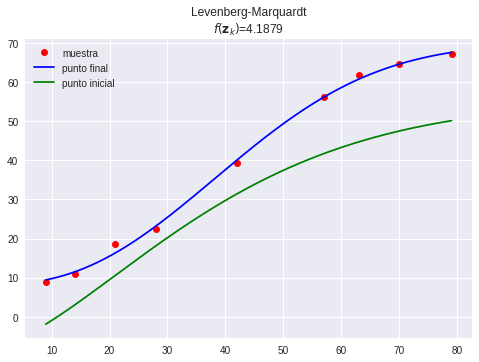

In [25]:
index_min=np.nanargmin(array_fki)
z_min=array_zki[index_min]
z_0min=z_ini[i,:]

'''
Gráfica del ajuste obtenido
'''
x,y=puntos.T
x_linspace=np.linspace(np.min(x),np.max(x),num=1000)
y_model_k=z_min[0]-z_min[1]*np.exp(-np.exp(z_min[2]+z_min[3]*np.log(x_linspace)))
y_model_ini=z_0min[0]-z_0min[1]*np.exp(-np.exp(z_0min[2]+z_0min[3]*np.log(x_linspace)))

plt.style.use('seaborn')
plt.plot(x,y,'ro',label='muestra')
plt.plot(x_linspace,y_model_k,'b-',label='punto final')
plt.plot(x_linspace,y_model_ini,'g-',label='punto inicial')
plt.title('Levenberg-Marquardt\n'+r'$f(\mathbf{z}_k)$=%.4f'%(array_fki[index_min]))
plt.legend()
plt.show()

En el que tenemos un ajuste aceptable. Revisando los valores de la función objetivo finales en cada iteración tenemos

In [26]:
array_fki

array([2324.03167778, 1244.77501071, 2324.03167778, 2324.0316778 ,
                 nan, 2324.03167778, 2324.03167778, 2324.03167778,
       2324.03167778, 2324.03167778, 1243.90078571, 2324.03167778,
          4.18794178,    4.18794178, 2324.03167778, 2324.03167778,
       2324.03167778,    4.18794178, 2324.03167778,    4.18794178,
          4.18794178, 2324.03167778,  844.988275  , 1820.88939375,
          4.18794178])

Vemos que realmente no es tan fácil obtener un valor cercano al óptimo de la función objetivo $f$, pues en su mayoría los valores son bastante más grandes. Podriamos ahora generar intervalos alrededor de las condiciones iniciales en las que se obtuvo un buen valor de la función objetivo.

## Ejercicio 3 (3 puntos)

Queremos encontrar una solución del problema de optimización con
restricciones 

$$ \min_{x_1,x_2} f(x_1,x_2) = 2(x_1^2 + x_2^2 - 1) - x_1 $$

sujeto a que el punto $(x_1,x_2)$ esté sobre el círculo unitario, es decir,

$$ x_1^2 + x_2^2 - 1 = 0.$$

Una manera de hallar una aproximación  es convertir este problema
de optimización sin restricciones. Un enfoque es el de penalización cuadrática
en el cual se construye la función 

$$ Q(x_1, x_2; \mu) = f(x_1,x_2) + \frac{\mu}{2} g(x_1, x_2),$$

donde $g(x_1, x_2) = (x_1^2 + x_2^2 - 1)^2$ es el cuadrado de la restricción
que queremos que se cumpla.

La idea es:

1. Dar un punto inicial $\mathbf{x}_0 =(10, 8)$ y un valor 
   del parámetro $\mu_0= 1$.
2. Para $r=0, 1, 2, 3$:

- Calcular el mínimo de la función $Q(\mathbf{x}; \mu_r)$ 
  usando el punto inicial $\mathbf{x}_0$
- Imprimir $\mu_r$, el óptimo $\mathbf{x}_k$ que devuelve el algoritmo,
  los valores $Q(\mathbf{x}_k; \mu_k)$,  $f(\mathbf{x}_k)$ y
  $g(\mathbf{x}_k)$
- Hacer $\mu_{r+1} = 10\mu_r$ y $\mathbf{x}_0=\mathbf{x}_k$.  

El último punto $\mathbf{x}_k$ generado debería ser una aproximación
de la solución del problema original porque  $Q(\mathbf{x}; \mu_r)= f(\mathbf{x})$
si $\mathbf{x}$ cumple la restricción. Si no, 
$Q(\mathbf{x}; \mu_r)> f(\mathbf{x})$ y el valor de $Q$ aumenta conforme
aumenta el valor de $\mu_r$. De este modo, al ir incrementando 
gradualmente el valor $\mu$, se penaliza cada vez más a los puntos que 
no satisfacen la restricción y eso hace que en cada iteración $r$
se obtenga un punto que está más cerca de cumplir la restricción. 

Note que en cada iteración $r$, se usa como punto inicial para el
algoritmo de optimización el punto que se obtuvo en la iteración
anterior. Esto ayuda a que los óptimos que se obtienen en cada iteración
gradualmente se vayan cumpliendo la restricción.

### Respuesta

A continuación haremos presentamos el esquema anterior optimizando la función $Q(\mathbf{x};\mu)$ dado $\mu$ vía Newton Raphson

In [35]:
importlib.reload(lib_examen_1)
from lib_examen_1 import *

N=1000
tol=np.finfo(float).eps**(1/3)
mu=1.0
x0=np.array([10.0,8.0])
a0,c=2.0,1e-4 # Tamaño inicial y factor de proporción fijo para las pruebas
rho=0.5

# Optimizacion sin reestriccion iterativa
for r in range(4):
    dic_results=grad_max_eje3(f_opt_eje3,grad_f_opt_eje3,x0,N,tol,a0,rho,c,mu)
    if dic_results['res']==1:
        print('El algoritmo CONVERGE')
        print('mu_r = ',mu)
        xk=dic_results['xk']
        print('xk = ',xk)
        print('Qk = ',dic_results['fk'])
        print('fk = ',f_eje3(xk))
        print('gk = ',g_eje3(xk))
        print('\n')
        x0=xk
        mu=10.0*mu
    else: 
        print('El algoritmo NO CONVERGE')
        break

El algoritmo CONVERGE
mu_r =  1.0
xk =  [4.23852450e-01 1.10217923e-15]
Qk =  -1.7280643278065917
fk =  -2.0645506514225485
gk =  0.6729726472319135


El algoritmo CONVERGE
mu_r =  10.0
xk =  [9.24176668e-01 1.57548970e-15]
Qk =  -1.1095412580699155
fk =  -1.2159716398975506
gk =  0.021286076365527005


El algoritmo CONVERGE
mu_r =  100.0
xk =  [9.92490733e-01 1.53318783e-15]
Qk =  -1.0112217338041674
fk =  -1.0224150235300673
gk =  0.00022386579451799847


El algoritmo CONVERGE
mu_r =  1000.0
xk =  [9.99249908e-01 1.33114696e-15]
Qk =  -1.0011247186093135
fk =  -1.0022491512681861
gk =  2.248865317745207e-06




En efecto vemos como el valor de $Q$ y $f$ en cada iteración se aproxima pues al penalizar forzamos a $g$ a hacerse casi $0$. Al final obtenemos el punto optimo en la circunferencia unitaria $(1,0)$.